### Student Information
Name: 蕭玉琁

Student ID: 111700045

GitHub ID: r0wan1ooo5

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

### 1. Setup

In [74]:
### Begin Assignment Here
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
nltk.download("punkt_tab")
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math

import helpers.data_mining_helpers as dmh
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/r0wan/DM2025/DM2025-Lab1-Exercise/.venv/bin/python
3.11.0 (v3.11.0:deaf509e8f, Oct 24 2022, 14:43:23) [Clang 13.0.0 (clang-1300.0.29.30)]


[nltk_data] Downloading package punkt to /Users/r0wan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/r0wan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### 2. Data Preparation
### 3. Data Transformation

In [75]:
Reddit = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")
Reddit.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [76]:
Reddit.dtypes

type             object
datetime         object
post_id          object
subreddit        object
title            object
author           object
url              object
upvotes           int64
downvotes       float64
upvote_ratio    float64
text             object
subjectivity    float64
polarity        float64
sentiment       float64
entities         object
label           float64
dtype: object

In [77]:
# recorrect data type
if 'datetime' in Reddit.columns:
    Reddit['datetime'] = pd.to_datetime(Reddit['datetime'], errors='coerce')

In [78]:
Reddit.dtypes

type                    object
datetime        datetime64[ns]
post_id                 object
subreddit               object
title                   object
author                  object
url                     object
upvotes                  int64
downvotes              float64
upvote_ratio           float64
text                    object
subjectivity           float64
polarity               float64
sentiment              float64
entities                object
label                  float64
dtype: object

In [79]:
# create a new binary column 'is_post' where 'type' is 'post'
Reddit['is_post'] = (Reddit['type'] == 'post').astype(int)

In [80]:
len(Reddit)

847

### 4. Data Mining using Pandas

In [81]:
# check missing values
Reddit.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,is_post
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0,0


In [82]:
# check duplicates
sum(Reddit.duplicated())

0

In [83]:
sum(Reddit['text'].duplicated())

23

In [84]:
# Show all columns for rows with duplicated 'text'
duplicated_texts = Reddit[Reddit['text'].duplicated(keep=False)]
display(duplicated_texts)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,is_post
34,comment,2021-02-01 13:45:52,gllif2v,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",SmithRune735,https://www.reddit.com/r/stocks/comments/la34b...,1,NaN,NaN,So they went from saying redditors are bad for...,0.666667,-0.7000,-1.0,"['market', 'silver']",1.0,0
42,comment,2021-02-01 13:45:17,gllicpw,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",SmithRune735,https://www.reddit.com/r/stocks/comments/la34b...,3943,NaN,NaN,So they went from saying redditors are bad for...,0.666667,-0.7000,-1.0,"['market', 'silver']",1.0,0
70,post,2025-03-29 18:14:28,1jmshlc,stockstobuytoday,FINRA Daily Shorts Data,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,Updated Daily by EOD\n\n \n[Daily Shorts](),0.100000,0.0000,0.0,"['EOD', 'Daily', 'Shorts', ']', '[']",0.0,1
105,post,2025-04-04 09:01:07,1jr7fe1,stockstobuytoday,World Markets,AutoModerator,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,\n\n [World Markets (stockbuyvest.com)](),0.000000,0.0000,0.0,"[']', 'World', 'stockbuyvest.com', 'Markets']",0.0,1
159,post,2025-04-11 13:54:31,1jwqgce,stockstobuytoday,Gappers (Up/Down),saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,Gappers for today\n\n [Gappers (stockbuyvest.c...,0.000000,0.0000,0.0,"['Gappers', 'stockbuyvest.com', ']', 'today', ...",0.0,1
160,post,2025-04-03 12:18:32,1jqgwyz,stockstobuytoday,Futures Market,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"how does the futures market look today\n\nSPY,...",0.377083,0.0625,1.0,"['Natural', 'stockbuyvest.com', 'Gold', 'marke...",0.0,1
179,post,2025-03-25 15:47:42,1jjmipo,stockstobuytoday,Dark Pool Data,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,This data is from FINRA ATS - Updated Weekly\n...,0.000000,0.0000,0.0,"['FINRA', 'data', 'ATS', 'FINRA ATS - Updated'...",0.0,1
192,post,2025-03-21 21:15:20,1jgrs02,stockstobuytoday,Commitment of Trader Report,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"Summarized with Highlights, updated weekly be ...",0.000000,0.0000,0.0,"[']', 'Highlights', 'Report', 'EOW', 'Summary'...",0.0,1
284,post,2025-04-06 16:00:59,1jsxft7,stockstobuytoday,Crypto Gainers - Coinbase,AutoModerator,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"&#x200B;\n\n [Cryptocurrency Prices, Charts, D...",0.000000,0.0000,0.0,"[']', 'Daily', 'Charts', 'PEPEUSD', 'Prices', ...",0.0,1
349,post,2025-03-22 18:14:30,1jhestv,stockstobuytoday,FINRA Daily Shorts Data,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,Updated Daily by EOD\n\n \n[Daily Shorts](),0.100000,0.0000,0.0,"['EOD', 'Daily', 'Shorts', ']', '[']",0.0,1


In [85]:
# Show all columns for rows where both 'datetime' and 'text' are duplicated together
duplicated_dt_text = Reddit[Reddit.duplicated(subset=['datetime', 'text'], keep=False)]
display(duplicated_dt_text)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,is_post


Althought there are 23 duplicate 'text', their 'datatime' is different. Since that might be the feature of the data (not wrong collection), i decided keep them.

#### 5. Data Preprocessing

##### 5.1 Sampling

In [86]:
Reddit_sample = Reddit.sample(n=500, random_state=42)
Reddit_sample.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,is_post
457,comment,2025-04-11 15:42:58,mmkwda9,StockMarket,Trump: We Are Doing Really Well On Our Tariff ...,IamNotaMonkeyRobot,https://i.redd.it/uajqu4kxl7ue1.png,1,NaN,NaN,"""We"" who?",0.000000,0.000000,0.0,[],0.0,0
342,comment,2025-04-12 03:04:05,mmob98a,wallstreetbets,Retail giant TARGET has now declined for 10 co...,iPlayedHockeInHS,https://i.redd.it/7tl6puv9waue1.jpeg,1,NaN,NaN,Chicken jockey,0.950000,-0.600000,-1.0,"['jockey', 'Chicken']",0.0,0
280,comment,2025-04-10 14:40:26,mme8wxn,StockMarket,How do you feel about a sitting president maki...,Narradisall,https://apnews.com/article/trump-truth-social-...,2,NaN,NaN,Not great Bob,0.750000,0.800000,1.0,['Bob'],-1.0,0
275,comment,2025-04-12 02:27:29,mmo5u51,wallstreetbets,Retail giant TARGET has now declined for 10 co...,ChristianLS,https://i.redd.it/7tl6puv9waue1.jpeg,1,NaN,NaN,"Speak for yourself, my wife is being harder on...",0.633333,0.633333,1.0,"['BBQ', 'potato', 'anime', 'wife', 'level', 'S...",0.0,0
843,comment,2025-04-11 05:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.000000,0.000000,0.0,[],0.0,0


In [87]:
print(f"lenth of Reddit: {len(Reddit)}")
print(f"lenth of Reddit_sample: {len(Reddit_sample)}")      


lenth of Reddit: 847
lenth of Reddit_sample: 500


In [88]:
# choose column 'sentiment' as target
print(Reddit_sample.sentiment.value_counts())


sentiment
 0.0    205
 1.0    186
-1.0    109
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment Distribution'}, xlabel='Sentiment', ylabel='Count'>

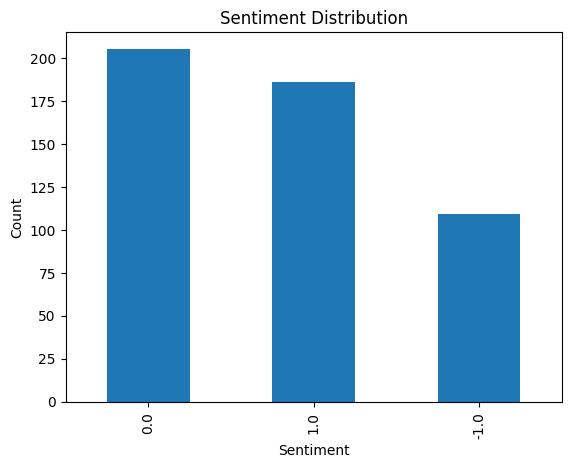

In [89]:
Reddit_sample.sentiment.value_counts().plot(kind='bar',
                                     title='Sentiment Distribution',
                                     ylim=[0, Reddit_sample.sentiment.value_counts().max() + 10],
                                     xlabel='Sentiment',
                                     ylabel='Count')

<Axes: title={'center': 'Sentiment Distribution Comparison'}, xlabel='Sentiment', ylabel='Count'>

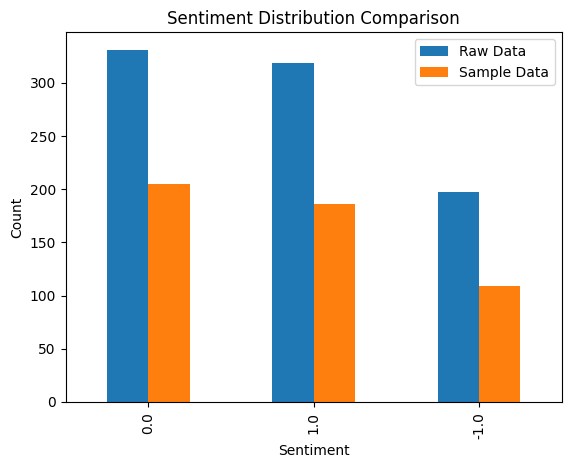

In [90]:
# compare sentiment distribution between raw data and sample data
raw_data = Reddit.sentiment.value_counts()
sample_data = Reddit_sample.sentiment.value_counts()   

df_compare = pd.DataFrame({
    'Raw Data': raw_data, 
    'Sample Data': sample_data})
df_compare.plot(
    kind='bar', 
    title='Sentiment Distribution Comparison', 
    xlabel='Sentiment', ylabel='Count')


##### 5.2 Feature Creation

In [91]:
Reddit_sample['unigrams'] = Reddit_sample['text'].apply(lambda x: dmh.tokenize_text(x))

In [92]:
Reddit_sample[0:4]["unigrams"]

457                                 [``, We, '', who, ?]
342                                    [Chicken, jockey]
280                                    [Not, great, Bob]
275    [Speak, for, yourself, ,, my, wife, is, being,...
Name: unigrams, dtype: object

In [93]:
Reddit_sample.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,is_post,unigrams
457,comment,2025-04-11 15:42:58,mmkwda9,StockMarket,Trump: We Are Doing Really Well On Our Tariff ...,IamNotaMonkeyRobot,https://i.redd.it/uajqu4kxl7ue1.png,1,NaN,NaN,"""We"" who?",0.000000,0.000000,0.0,[],0.0,0,"[``, We, '', who, ?]"
342,comment,2025-04-12 03:04:05,mmob98a,wallstreetbets,Retail giant TARGET has now declined for 10 co...,iPlayedHockeInHS,https://i.redd.it/7tl6puv9waue1.jpeg,1,NaN,NaN,Chicken jockey,0.950000,-0.600000,-1.0,"['jockey', 'Chicken']",0.0,0,"[Chicken, jockey]"
280,comment,2025-04-10 14:40:26,mme8wxn,StockMarket,How do you feel about a sitting president maki...,Narradisall,https://apnews.com/article/trump-truth-social-...,2,NaN,NaN,Not great Bob,0.750000,0.800000,1.0,['Bob'],-1.0,0,"[Not, great, Bob]"
275,comment,2025-04-12 02:27:29,mmo5u51,wallstreetbets,Retail giant TARGET has now declined for 10 co...,ChristianLS,https://i.redd.it/7tl6puv9waue1.jpeg,1,NaN,NaN,"Speak for yourself, my wife is being harder on...",0.633333,0.633333,1.0,"['BBQ', 'potato', 'anime', 'wife', 'level', 'S...",0.0,0,"[Speak, for, yourself, ,, my, wife, is, being,..."
843,comment,2025-04-11 05:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.000000,0.000000,0.0,[],0.0,0,"[Where, can, I, read, this, ?]"


In [94]:
list(Reddit_sample[0:1]['unigrams'])

[['``', 'We', "''", 'who', '?']]

##### 5.3 Feature subset selection

In [95]:
count_vect = CountVectorizer()
Reddit_sample_counts = count_vect.fit_transform(Reddit_sample.text) #learn the vocabulary and return document-term matrix
print(Reddit_sample_counts[0])

  (np.int32(0), np.int32(3142))	1
  (np.int32(0), np.int32(3175))	1


In [96]:
analyze = count_vect.build_analyzer()
analyze(Reddit_sample.text[457])

['we', 'who']

In [97]:
Reddit_sample_counts.shape

(500, 3263)

In [98]:
count_vect.get_feature_names_out()[0:10]


array(['000', '01378', '02', '03', '08', '10', '100', '1000', '10000',
       '100k'], dtype=object)

In [99]:
Reddit_sample_counts.shape

(500, 3263)

In [100]:
Reddit_sample_counts[8:12, 0:200].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 

In [101]:
count_vect.get_feature_names_out()[196:197]

array(['all'], dtype=object)

In [102]:
col_indices = Reddit_sample_counts[0:12, 0:200].nonzero()[1]   # take the non-zero column index
words = [count_vect.get_feature_names_out()[i] for i in col_indices]
for i in range(len(col_indices)):
    print(f"word {col_indices[i]}: {words[i]}")

word 84: 50
word 36: 200k
word 84: 50
word 57: 30
word 33: 20
word 11: 11
word 196: all


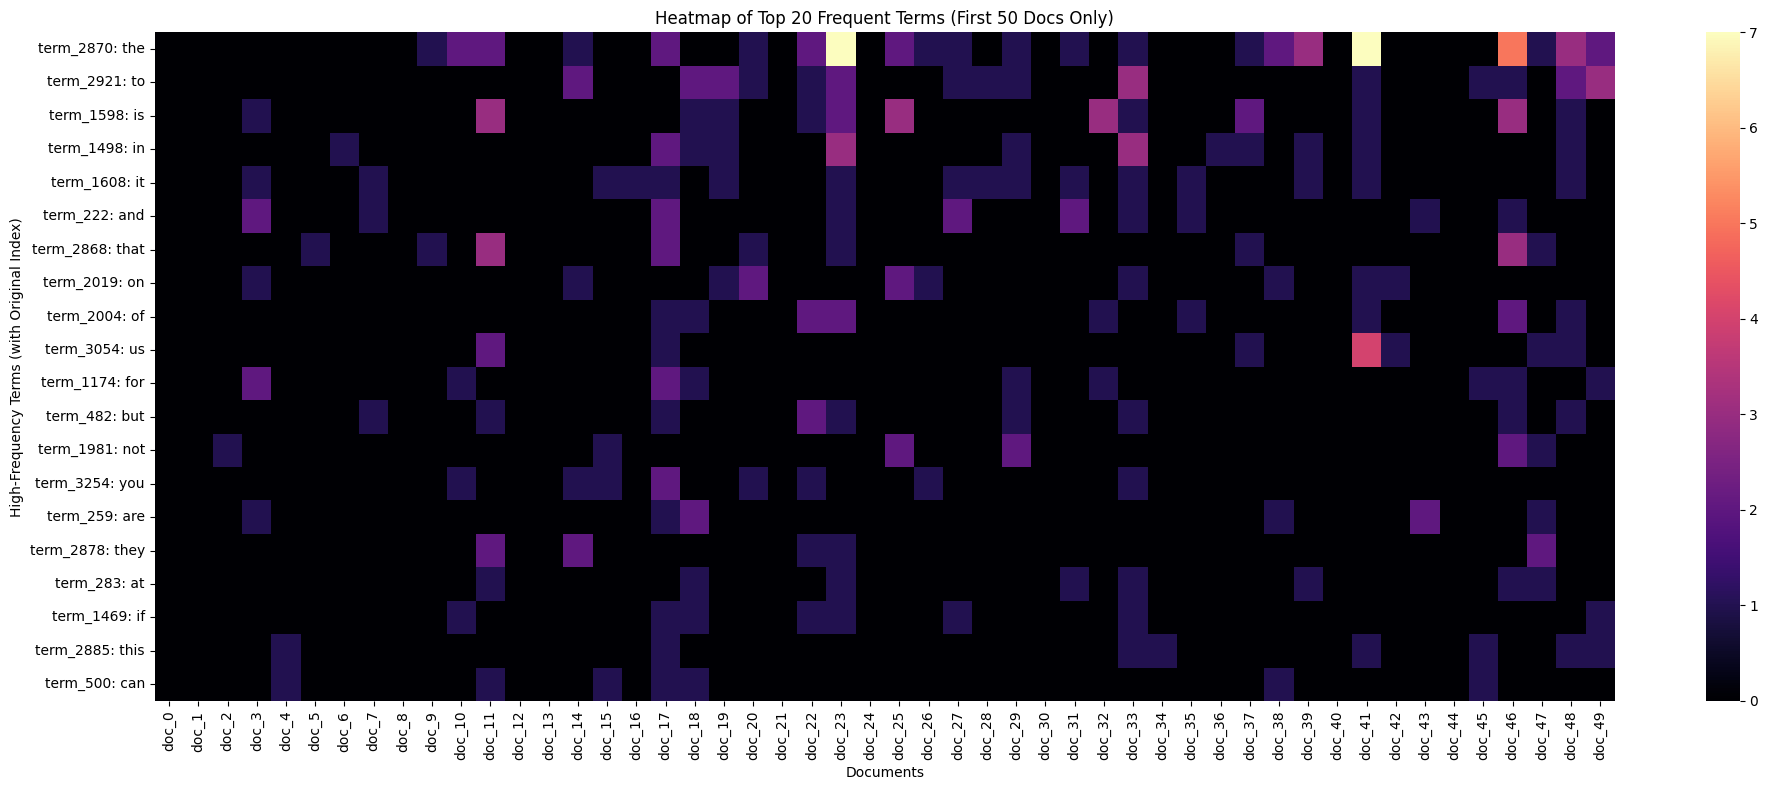

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

num_docs = 50  # choose the amount of documents to visualize
top_n = 20     # choose the amount of top frequent terms to visualize

# calculate term frequencies in the first num_docs documents
term_freq = np.asarray(Reddit_sample_counts[:num_docs].sum(axis=0)).ravel()
top_idx = np.argsort(term_freq)[::-1][:top_n]   

# take the amount of top_n terms in each of the first num_docs documents
X_top = Reddit_sample_counts[:num_docs, top_idx].toarray()

# take term names
terms = np.array(count_vect.get_feature_names_out())[top_idx]

# labels for plot
exer_plot_x = [f"term_{idx}: {term}" for idx, term in zip(top_idx, terms)]
exer_plot_y = [f"doc_{i}" for i in range(num_docs)]

df_todraw = pd.DataFrame(
    X_top.T,
    index=exer_plot_x,
    columns=exer_plot_y
)

plt.figure(figsize=(min(20, num_docs // 2), 8))
sns.heatmap(df_todraw, cmap="magma", cbar=True)
plt.xlabel("Documents")
plt.ylabel("High-Frequency Terms (with Original Index)")
plt.title(f"Heatmap of Top {top_n} Frequent Terms (First {num_docs} Docs Only)")
plt.tight_layout()
plt.show()


##### 5.4 Attribute Transformation

In [104]:
term_frequencies = []
for j in range(0,Reddit_sample_counts.shape[1]):
    term_frequencies.append(sum(Reddit_sample_counts[:,j].toarray()))

term_frequencies = np.asarray(Reddit_sample_counts.sum(axis=0))[0]
term_frequencies[0] 


np.int64(5)

In [105]:
import plotly.express as px

fig = px.bar(
    x = count_vect.get_feature_names_out()[:300],
    y = term_frequencies[:300],                     # choose top 300 terms
    labels={'x':'Terms', 'y':'Frequencies'},
    title="Top 300 Terms Frequency"
)
fig.update_layout(xaxis_tickangle=90)  
fig.show()


top frequency terms

/var/folders/49/11swh7_n1x358qyfrqndksw00000gn/T/ipykernel_81219/842510458.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



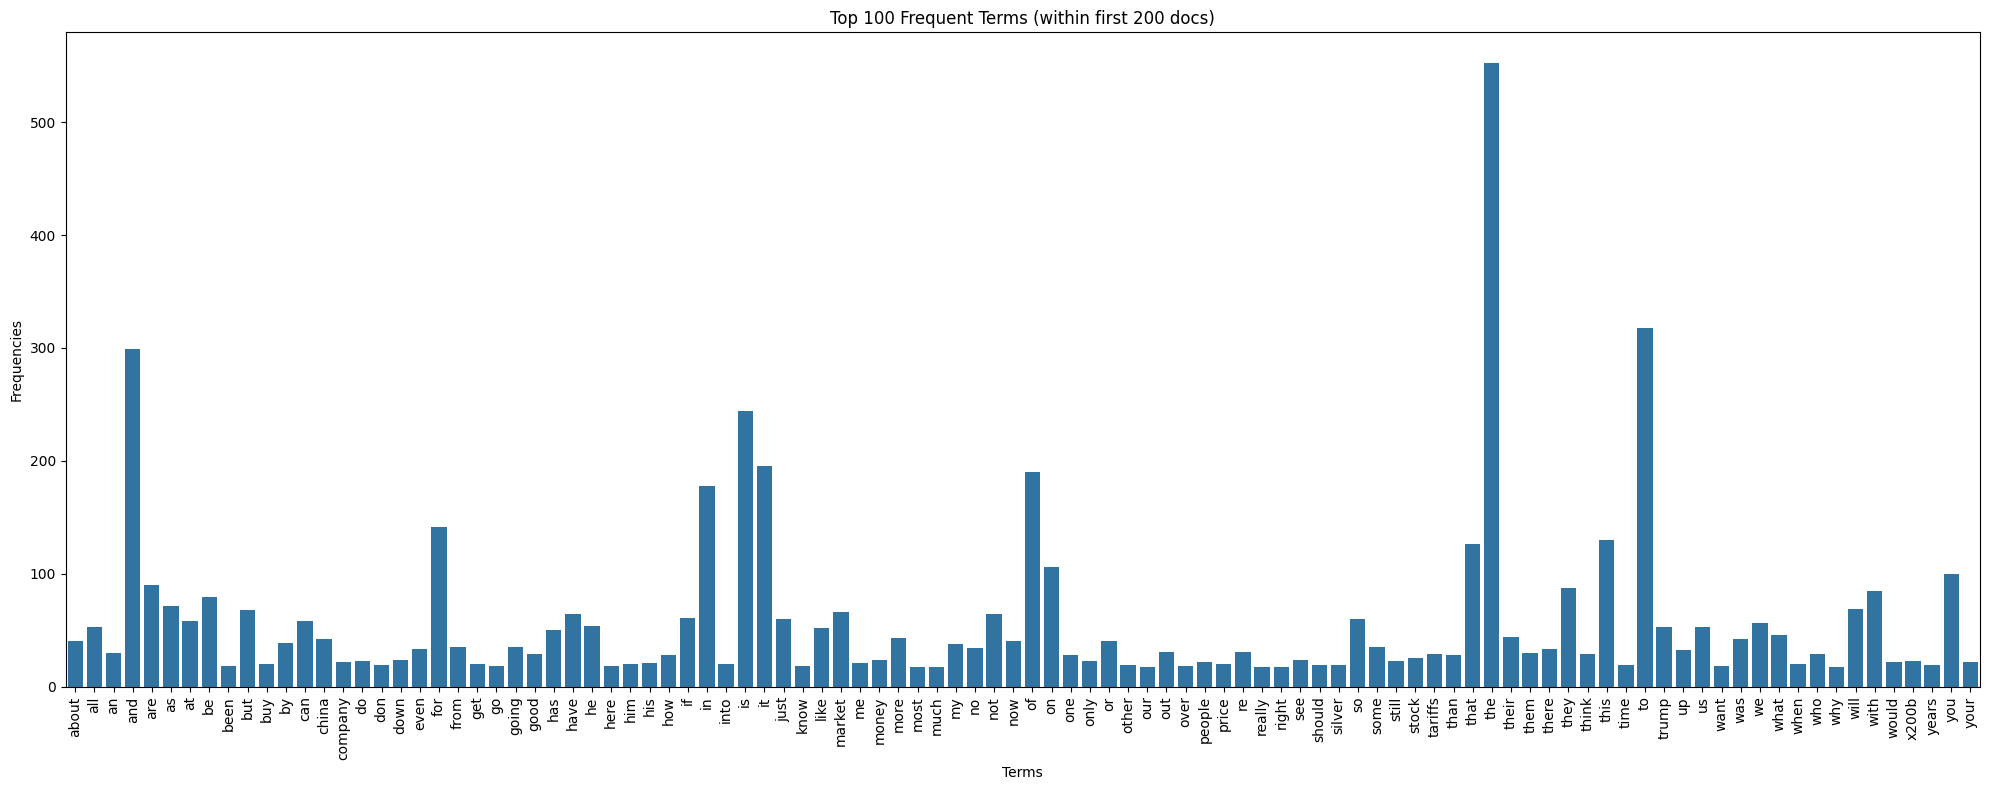

In [106]:
num_docs_2 = 200   # choose the amount of documents to visualize
top_n_2  = 100     # choose the amount of top frequent terms to visualize

# cauculate term frequencies in the first num_docs documents
term_freq_2 = np.asarray(Reddit_sample_counts.sum(axis=0)).ravel()

# pick the indices of the top_n_2 most frequent terms (no sorting by frequency)
rough     = np.argpartition(term_freq_2, -top_n_2)[-top_n_2:]
topn_idx  = np.sort(rough)   

# take the amount of top_n terms in each of the first num_docs documents
X_small = Reddit_sample_counts[:num_docs_2, topn_idx].toarray()
terms   = np.array(count_vect.get_feature_names_out())[topn_idx]

# collect the top term frequencies for plotting
top_term_freq_2 = term_freq_2[topn_idx]


plt.figure(figsize=(20, 8))
g = sns.barplot(x=terms, y=top_term_freq_2)
g.set_xticklabels(terms, rotation=90)
plt.title(f"Top {top_n_2} Frequent Terms (within first {num_docs_2} docs)")
plt.xlabel("Terms")
plt.ylabel("Frequencies")
plt.tight_layout()
plt.show()


top frequency terms ( long-tailed )

/var/folders/49/11swh7_n1x358qyfrqndksw00000gn/T/ipykernel_81219/4056161656.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



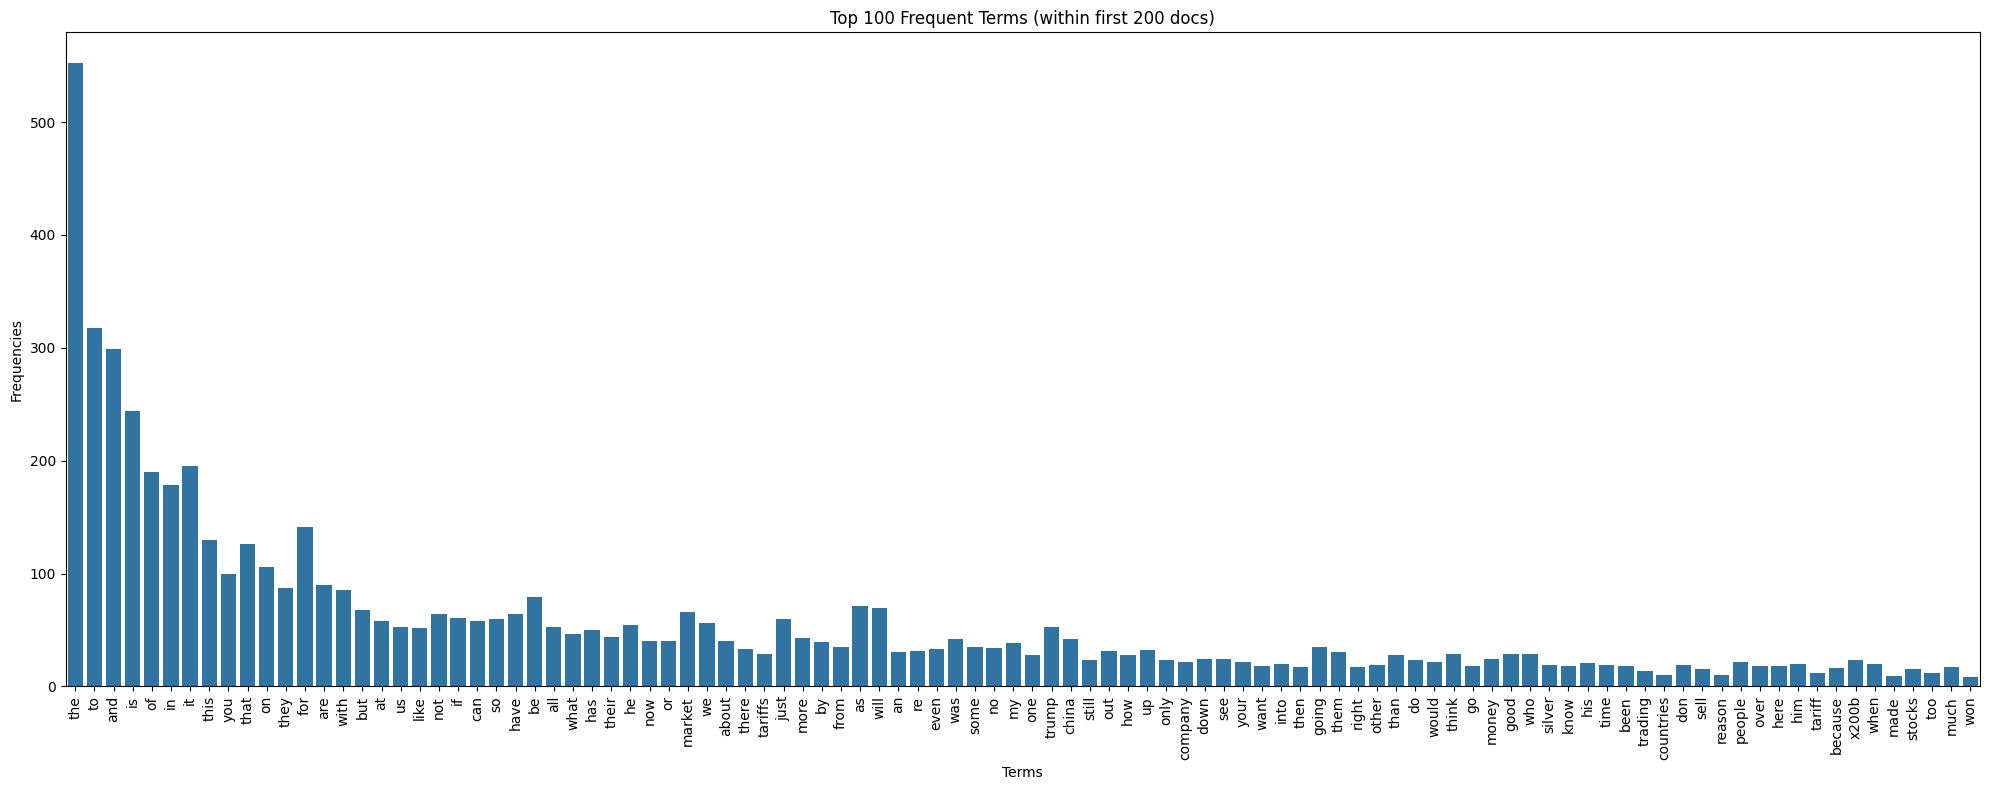

In [107]:
num_docs_2 = 200   # choose the amount of documents to visualize
top_n_2  = 100     # choose the amount of top frequent terms to visualize

# cauculate term frequencies in the first num_docs documents
term_frequencies_log = np.asarray(Reddit_sample_counts[:num_docs_2].sum(axis=0)).ravel()

# pick the indices of the top_n most frequent terms efficiently (O(n) partition + local sort)
rough = np.argpartition(term_frequencies_log, -top_n_2)[-top_n_2:]
topn_idx = rough[np.argsort(term_frequencies_log[rough])[::-1]]

# take the amount of top_n terms in each of the first num_docs documents
X_small = Reddit_sample_counts[:num_docs_2, topn_idx].toarray()
terms   = np.array(count_vect.get_feature_names_out())[topn_idx]

# collect the top term frequencies for plotting
top_term_freq_2_log = term_freq_2[topn_idx]


plt.figure(figsize=(20, 8))
g = sns.barplot(x=terms, y=top_term_freq_2_log)
g.set_xticklabels(terms, rotation=90)
plt.title(f"Top {top_n_2} Frequent Terms (within first {num_docs_2} docs)")
plt.xlabel("Terms")
plt.ylabel("Frequencies")
plt.tight_layout()
plt.show()

/var/folders/49/11swh7_n1x358qyfrqndksw00000gn/T/ipykernel_81219/3655612951.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



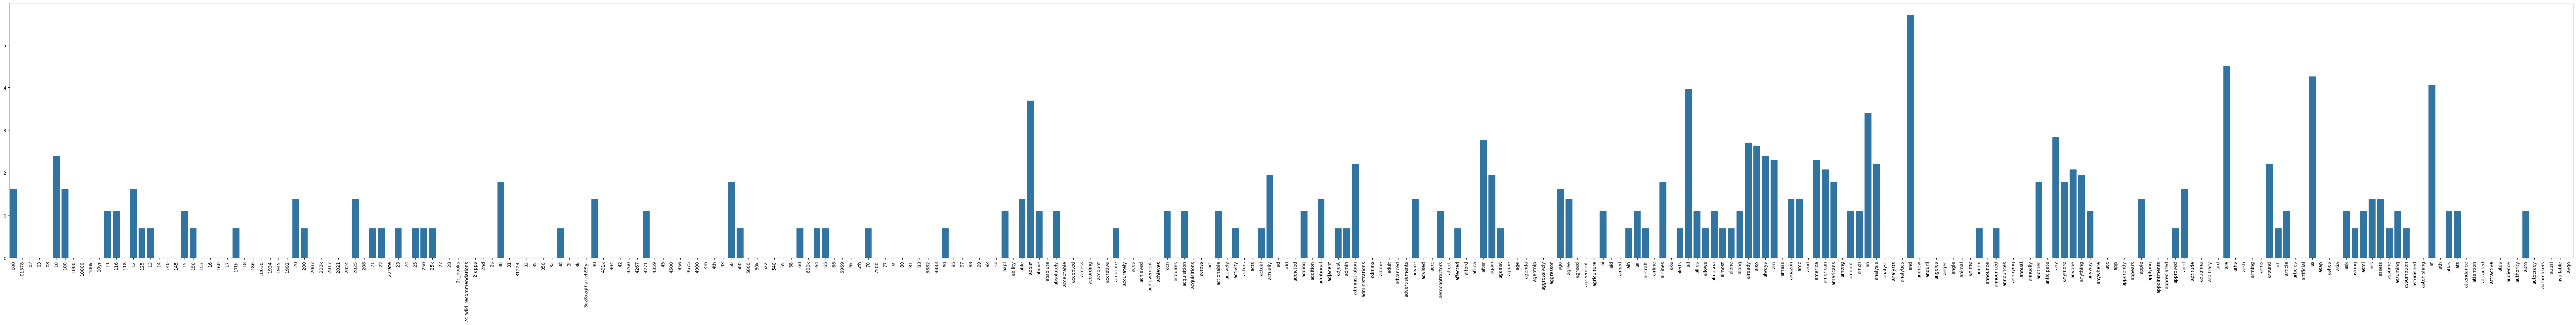

In [108]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

top frequency terms ( log )

/var/folders/49/11swh7_n1x358qyfrqndksw00000gn/T/ipykernel_81219/1314664237.py:23: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



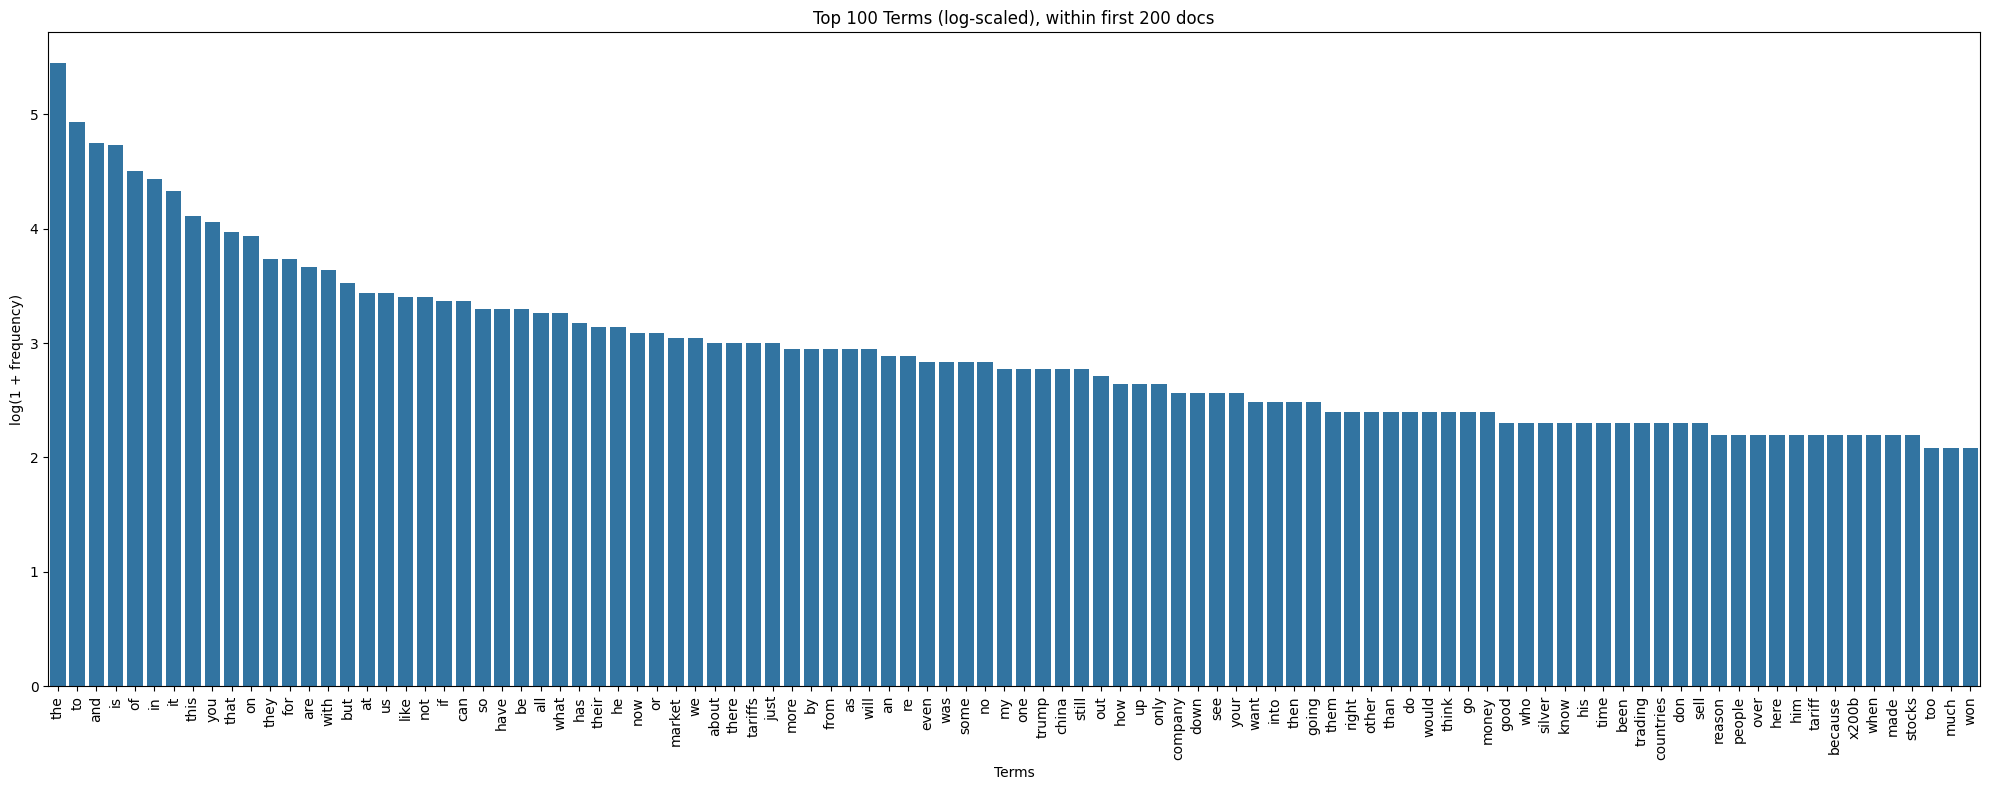

In [109]:
# choose the amount of documents/terms to visualize
num_docs_2 = 200
top_n_2    = 100

# calculate raw term frequencies in the first num_docs_2 documents
tf = np.asarray(Reddit_sample_counts[:num_docs_2].sum(axis=0)).ravel()    

# select the indices of the top_n_2 most frequent terms (by raw counts)
rough     = np.argpartition(tf, -top_n_2)[-top_n_2:]
topn_idx  = rough[np.argsort(tf[rough])[::-1]]                 # sorted by raw frequency desc

# take the amount of top_n_2 terms in each of the first num_docs_2 documents
X_small = Reddit_sample_counts[:num_docs_2, topn_idx].toarray()
terms   = np.array(count_vect.get_feature_names_out())[topn_idx]

# apply log transform for plotting (sublinear scaling)
tf_log = np.log1p(tf)                                          # log(1 + tf), shape: (n_terms,)
top_term_frequencies_log = tf_log[topn_idx]                    # same terms as above


plt.figure(figsize=(20, 8))
g = sns.barplot(x=terms, y=top_term_frequencies_log)
g.set_xticklabels(terms, rotation=90)
plt.title(f"Top {top_n_2} Terms (log-scaled), within first {num_docs_2} docs")
plt.xlabel("Terms")
plt.ylabel("log(1 + frequency)")
plt.tight_layout()
plt.show()


Scatter plot: Polarity vs Subjectivity by Subreddit

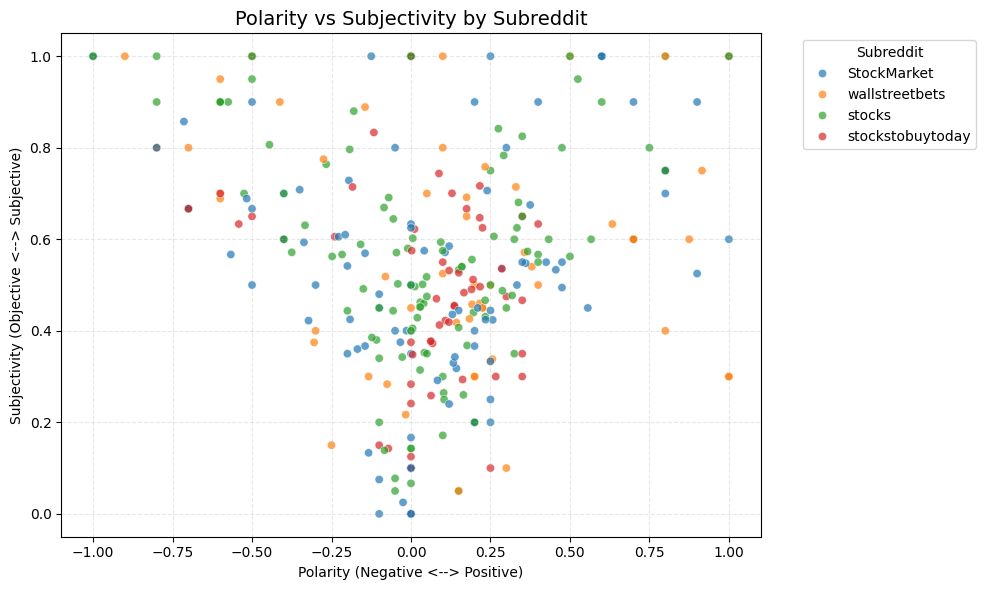

In [110]:
Reddit_sample['polarity'] = pd.to_numeric(Reddit_sample['polarity'], errors='coerce')
Reddit_sample['subjectivity'] = pd.to_numeric(Reddit_sample['subjectivity'], errors='coerce')


df_plot = Reddit_sample.dropna(subset=['polarity', 'subjectivity', 'subreddit'])

top_subs = df_plot['subreddit'].value_counts().head(8).index
df_top = df_plot[df_plot['subreddit'].isin(top_subs)]


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_top,
    x='polarity',
    y='subjectivity',
    hue='subreddit',
    alpha=0.7,
    palette='tab10'
)

plt.title("Polarity vs Subjectivity by Subreddit", fontsize=14)
plt.xlabel("Polarity (Negative <--> Positive)")
plt.ylabel("Subjectivity (Objective <--> Subjective)")
plt.legend(title="Subreddit", bbox_to_anchor=(1.05, 1))
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

##### 整體觀察
1. 情緒極性分佈: 大多數點集中在 接近 0 的區域，表示多數貼文的情緒偏中立，接近 -1 或 +1 的極端情緒貼文相對少見。
2. 主觀性分佈: 多數貼文的主觀性介於 0.4 到 0.8 之間，顯示大部分內容帶有一定的主觀意見，而非完全客觀。

##### Subreddit 差異
StockMarket（藍色） 與 stocks（綠色） 分佈較均勻，整體情緒偏中性，可能反映分析討論類貼文居多。
wallstreetbets（橘色） 的點分布較極端且主觀性高。
stockstobuytoday（紅色） 的貼文多為中度正向但主觀性偏高，可能表示其內容多為個人意見或建議。

##### 解讀與洞察

推測社群性質：
* StockMarket 可能為提供分析建議的社群，使其語氣中立、主觀性低。
* wallstreetbets 語氣極端、主觀性高，推測其社群可能較情緒化或投機。


# Phase 2

#####  5.4.2 Finding frequent patterns

In [111]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Create separate DataFrames for each category (use subreddit as category)
categories = Reddit['subreddit'].unique()  # Get unique subreddit labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = Reddit[Reddit['subreddit'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    # Use 'text' column from the new dataset; fill NaN with empty string to avoid errors
    X_counts = count_vect.fit_transform(df['text'].fillna(''))  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])


In [112]:
category_number=3#change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category stocks:


,00,000,02,03,06,10,100,10000,10ks,10yr,...,you,young,your,yours,yourself,yoyo,yup,zero,zgld,zsil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


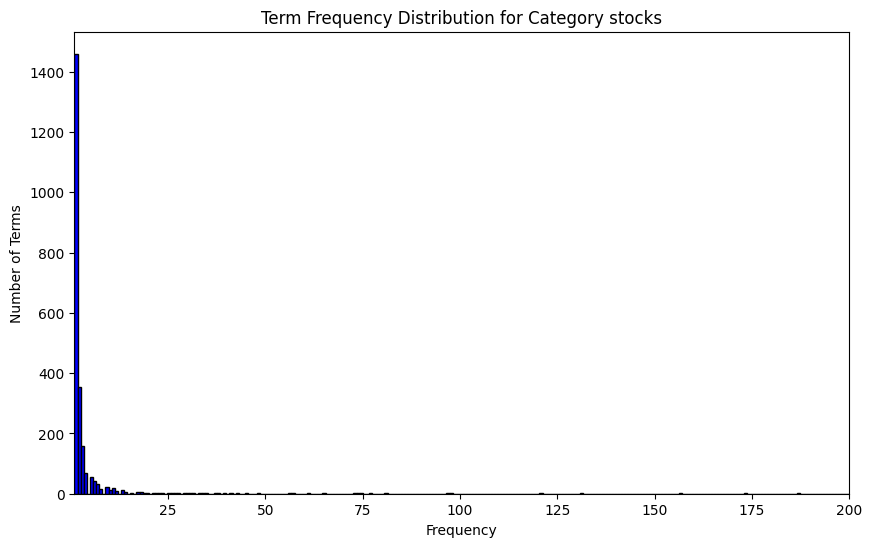

In [113]:
 # Sum over all documents to get total frequency for each word
category_number=3 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=500, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [114]:
category_number=3 #change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: stocks
Number of terms in top 5%: 117
Filtered terms: ['the', 'to', 'and', 'is', 'it', 'of', 'in', 'you', 'that', 'on', 'this', 'for', 'will', 'are', 'be', 'if', 'as', 'us', 'with', 'but', 'he', 'all', 'trump', 'at', 'not', 'have', 'they', 'what', 'or', 'was', 'so', 'we', 'people', 'like', 'market', 'has', 'my', 'from', 'there', 'more', 'now', 'your', 'no', 'think', 'china', 'by', 'silver', 'just', 'their', 'can', 'how', 'even', 'do', 'money', 'than', 're', 'an', 'other', 'why', 'one', 'about', 'would', 'going', 'tariffs', 'them', 'some', 'any', 'our', 'most', 'don', 'who', 'when', 'economy', 'see', 'down', 'his', 'then', 'me', 'because', 'world', 'been', 'up', 'want', 'back', 'time', 'term', 'companies', 'already', 'good', 'doing', 'last', 'really', 'portfolio', 'sell', 'only', 'much', 'which', '10', 'years', 'over', 'could', 'out', 'too', 'day', 'trade', 'every', 'into', 'wants', 'go', 'buy', 'does', 'here', 'him', 'point', 'company', 'get', 'bad']


In [115]:
sorted_counts #We can see the frequencies sorted in a descending order

array([399, 251, 187, ...,   1,   1,   1])

In [116]:
sorted_indices #This are the indices corresponding to the words after being sorted in a descending order

array([2048, 2096,  148, ..., 1375, 1377, 1172])

In [117]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0) #Here we can sum up the column corresponding to the top 5% words, we just specify which one first.

np.int64(399)

In [118]:
category_number=3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: stocks
Number of terms in bottom 1%: 23
Filtered terms: ['leaning', 'newsletter', 'newb', 'net', 'neither', 'negotiations', 'negotiating', 'negatively', 'neck', 'necessities', 'necessary', 'nearly', 'near', 'navarro', 'nauseam', 'nations', 'nationalist', 'national', 'name', 'nah', 'mutual', 'muscles', 'murica']


In [119]:
sorted_counts #We can see the frequencies sorted in an ascending order

array([  1,   1,   1, ..., 187, 251, 399])

In [120]:
sorted_indices #This are the indices corresponding to the words after being sorted in an ascending order

array([1172, 1377, 1375, ...,  148, 2096, 2048])

In [121]:
category_number = 1  

def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate total word frequencies across all docs
    word_sums = term_document_df.sum(axis=0)
    
    # Sort words by frequency
    sorted_words = word_sums.sort_values()
    
    # Compute number of words in top/bottom range
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Words to remove
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    print(f'Bottom {bottom_percent*100}% words:\n{sorted_words.head(bottom_n)}')
    print(f'Top {top_percent*100}% words:\n{sorted_words.tail(top_n)}')
    
    # Return filtered DataFrame
    return term_document_df.drop(columns=words_to_remove)

# === Apply the filter to each category ===
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category}, we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# === Display the filtered result for one category ===
print(f"\nFiltered Term-Document Frequency DataFrame for Category: {categories[category_number]}")
term_document_dfs[categories[category_number]]


For category wallstreetbets, we filter the following words:
Bottom 1.0% words:
zero             1
intern           1
international    1
store            1
investing        1
investment       1
ip               1
ipo              1
iq               1
dtype: int64
Top 5.0% words:
she          8
market       8
with         8
still        8
when         8
go           8
if           8
what         9
up           9
good         9
puts         9
about        9
there        9
no           9
target      10
we          10
be          10
will        10
now         10
not         10
over        11
all         11
was         11
have        12
are         12
at          14
but         15
just        15
can         15
like        16
so          17
emote       18
img         18
t5_2th52    18
on          20
my          21
that        21
of          23
this        24
they        25
for         26
you         28
is          29
in          29
and         37
it          43
the         57
to          60


,10,100,100x,12,1945,1947,1953,1961,1969,1973,...,yea,yeah,year,years,yes,yet,yo,your,yourselves,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### >>> Exercise 16

top 5% 的詞彙多為介係詞、連接詞或常見功能詞，如 the、of、and 等，屬於高頻通用語，雖然出現頻繁，但語意籠統、區辨度低，對主題分析幫助有限。相對地，bottom 1% 的詞彙多為罕見或專有名詞，如人名、檔名等，出現次數很少，語意狹窄且不具代表性。因此，適度過濾這兩端的極端詞彙，有助於保留中頻且具資訊性的詞語，使後續的主題或關聯分析更精準、具解釋力。

The top 5% of words are mostly prepositions, conjunctions, or other common function words—such as the, of, and and. While these words appear frequently, they are semantically broad and offer little distinction between topics, making them of limited value for analysis.
In contrast, the bottom 1% of words tend to be rare or highly specific terms, such as names or file references. These occur infrequently, carry narrow meanings, and lack general representativeness.
By filtering out both extremes, we can retain mid-frequency words that are more informative and meaningful, resulting in more accurate and interpretable outcomes in subsequent topic or association analyses.

In [122]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           

    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


Database size (total no of transactions) : 274
Number of items : 2206
Minimum Transaction Size : 1
Average Transaction Size : 14.284671532846716
Maximum Transaction Size : 165
Standard Deviation Transaction Size : 17.008134123176575
Variance in Transaction Sizes : 290.3362476939119
Sparsity : 0.993524627591638


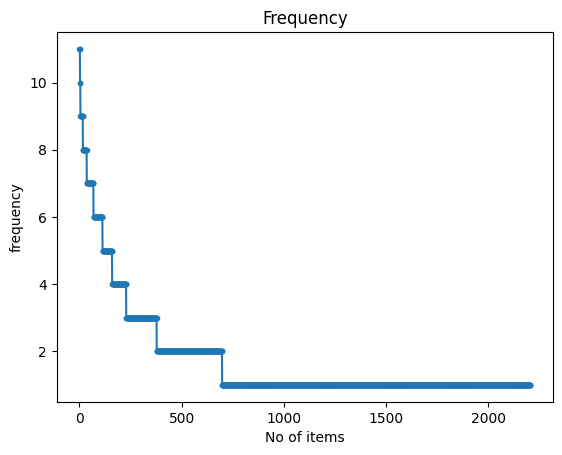

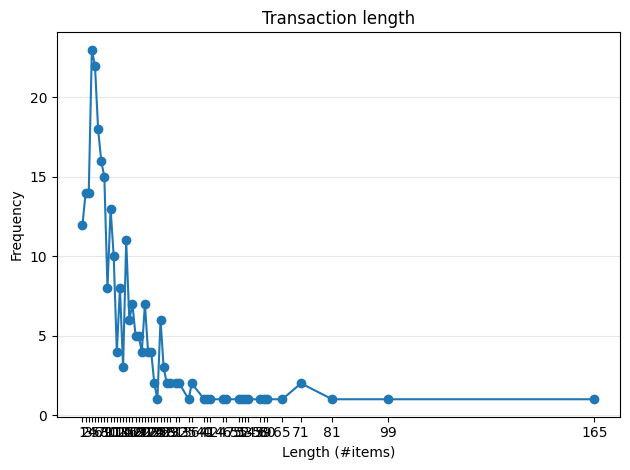

In [123]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_stocks.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 248
Number of items : 1499
Minimum Transaction Size : 1
Average Transaction Size : 10.153225806451612
Maximum Transaction Size : 145
Standard Deviation Transaction Size : 12.30692458821371
Variance in Transaction Sizes : 152.07359279091028
Sparsity : 0.993226667240526


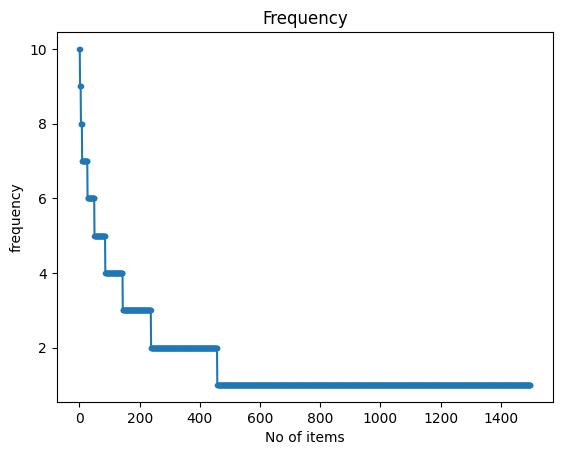

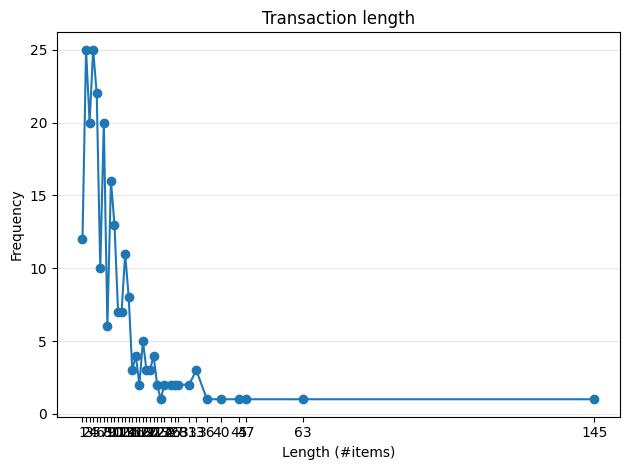

In [124]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_StockMarket.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 172
Number of items : 1522
Minimum Transaction Size : 1
Average Transaction Size : 14.046511627906977
Maximum Transaction Size : 219
Standard Deviation Transaction Size : 25.67570880647662
Variance in Transaction Sizes : 663.0972392220863
Sparsity : 0.9907710173272621


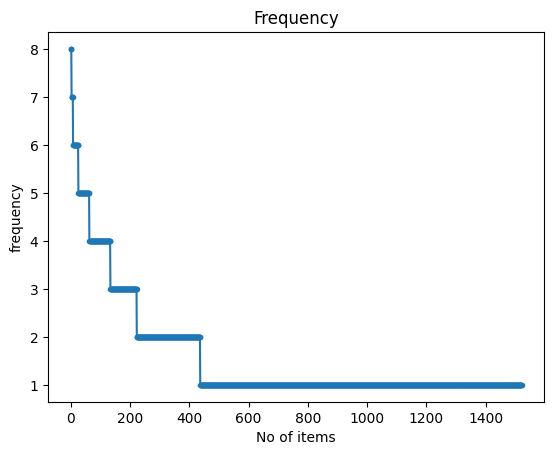

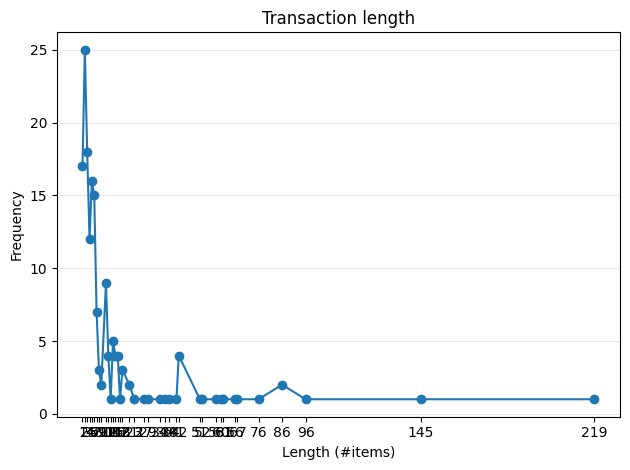

In [125]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_stockstobuytoday.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 146
Number of items : 915
Minimum Transaction Size : 1
Average Transaction Size : 9.308219178082192
Maximum Transaction Size : 62
Standard Deviation Transaction Size : 9.376131945174984
Variance in Transaction Sizes : 88.51813887576759
Sparsity : 0.9898270828654839


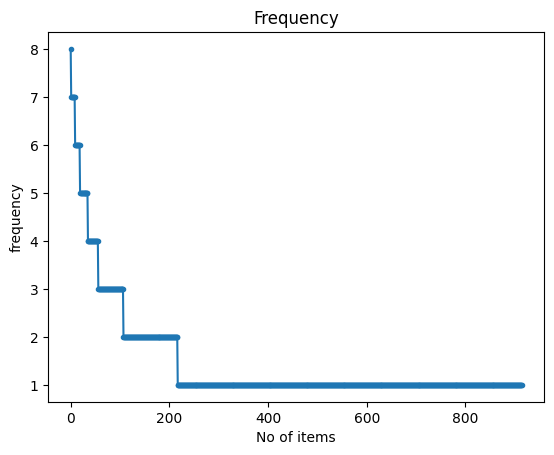

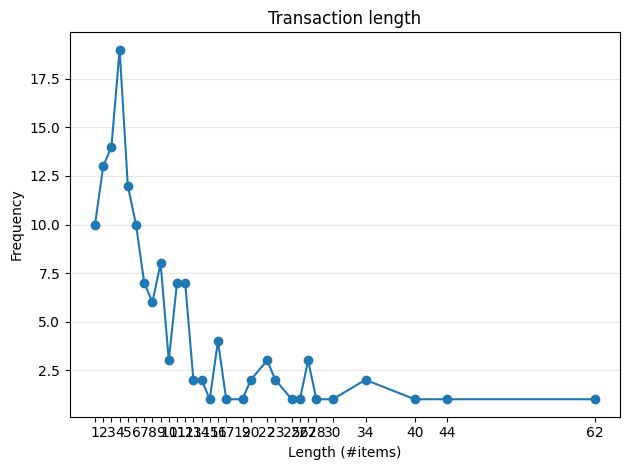

In [126]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_wallstreetbets.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [127]:
# StockMarket dataset frequent pattern mining
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6    #for this dataset, 9 might be too high, i adjust it to 6
obj1 = alg.FPGrowth(iFile='td_freq_db_StockMarket.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_StockMarket= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_StockMarket))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 50
Runtime: 0.001596212387084961


In [128]:
obj1.save('freq_patterns_db_StockMarket_minSup9.txt') #save the patterns
frequentPatternsDF_StockMarket

,Patterns,Support
0,trade,6
1,usd,6
2,sure,6
3,did,6
4,since,6
5,some,6
6,gonna,6
7,trading,6
8,plan,6
9,bad,6


In [129]:
# stocks dataset frequent pattern mining
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6   #for this dataset, 9 might be too high, i adjust it to 3
obj1 = alg.FPGrowth(iFile='td_freq_db_stocks.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_stocks= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_stocks))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 113
Runtime: 0.002271890640258789


In [130]:
obj1.save('freq_patterns_db_stocks_minSup9.txt') #save the patterns
frequentPatternsDF_stocks

,Patterns,Support
0,few,6
1,lot,6
2,high,6
3,new,6
4,call,6
...,...,...
108,shit,10
109,know,10
110,things,11
111,also,11


In [131]:
# stockstobuytody dataset frequent pattern mining
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6   #for this dataset, 9 might be too high, i adjust it to 3
obj1 = alg.FPGrowth(iFile='td_freq_db_stockstobuytoday.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_stockstobuytoday= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_stockstobuytoday))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 30
Runtime: 0.0010688304901123047


In [132]:
obj1.save('freq_patterns_db_stocks_minSup9.txt') #save the patterns
frequentPatternsDF_stockstobuytoday

,Patterns,Support
0,rise,6
1,all,6
2,cap,6
3,do,6
4,many,6
5,right,6
6,we,6
7,shorts,6
8,should,6
9,too,6


In [133]:
# wallstreetbets dataset frequent pattern mining
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6   #for this dataset, 9 might be too high, i adjust it to 6
obj1 = alg.FPGrowth(iFile='td_freq_db_wallstreetbets.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_wallstreetbets= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_wallstreetbets))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 19
Runtime: 0.0061800479888916016


In [134]:
obj1.save('freq_patterns_db_wallstreetbets_minSup9.txt') #save the patterns
frequentPatternsDF_stockstobuytoday

,Patterns,Support
0,rise,6
1,all,6
2,cap,6
3,do,6
4,many,6
5,right,6
6,we,6
7,shorts,6
8,should,6
9,too,6


In [135]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_stocks, frequentPatternsDF_stockstobuytoday, frequentPatternsDF_StockMarket, frequentPatternsDF_wallstreetbets]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

    Patterns  Support
86    things       11
87      also       11
85      shit       10
135    there       10
84    reddit        9
..       ...      ...
96    btcusd        6
95     would        6
94       too        6
93    shorts        6
0        few        6

[146 rows x 2 columns]
Number of patterns discarded: 66


In [136]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
Reddit_tdm = count_vect.fit_transform(Reddit['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
Reddit['tokenized_text'] = Reddit['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=Reddit.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = Reddit['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(Reddit_tdm.toarray(), columns=terms, index=Reddit.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,06,08,10,100,...,btcusd\tpepeusd\tethusd,pepeusd,we,ethusd\tbtcusd,ethusd,btcusd,would,too,shorts,few
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### >>> Exercise 17

In [138]:
# Answer Here
from PAMI.frequentPattern.topk import FAE as alg_topk
import pandas as pd

topk_trials = [100, 300, 500]
fae_results = []
fae_dfs = {}

for k in topk_trials:
    obj = alg_topk.FAE(iFile='td_freq_db_stocks.csv', k=k)
    obj.mine()
    df = obj.getPatternsAsDataFrame()   # columns typically: ['pattern','support'] 或類似
    rt = obj.getRuntime()
    fae_results.append({
        "algo": "FAE-TopK",
        "param": f"k={k}",
        "num_patterns": len(df),
        "runtime_sec": rt
    })
    fae_dfs[k] = df
    print(f"[FAE-TopK] k={k}")
    print("Total No of patterns:", len(df))
    print("Runtime:", rt)
    # 只示範列出前 10 筆（若 df 已含 support 欄位則可排序；沒有就直接 head）
    try:
        display(df.sort_values(by='support', ascending=False).head(10))
    except Exception:
        display(df.head(10))


 TopK frequent patterns were successfully generated using FAE algorithm.
[FAE-TopK] k=100
Total No of patterns: 100
Runtime: 0.005014181137084961


,Patterns,Support
0,things,11
1,also,11
2,since,11
3,shit,10
4,know,10
5,looking,9
6,ve,9
7,right,9
8,buying,9
9,seems,9


 TopK frequent patterns were successfully generated using FAE algorithm.
[FAE-TopK] k=300
Total No of patterns: 300
Runtime: 0.007795095443725586


,Patterns,Support
0,things,11
1,also,11
2,since,11
3,shit,10
4,know,10
5,looking,9
6,ve,9
7,right,9
8,buying,9
9,seems,9


 TopK frequent patterns were successfully generated using FAE algorithm.
[FAE-TopK] k=500
Total No of patterns: 500
Runtime: 0.27388978004455566


,Patterns,Support
0,things,11
1,also,11
2,since,11
3,shit,10
4,know,10
5,looking,9
6,ve,9
7,right,9
8,buying,9
9,seems,9


In [139]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg_max

minsup_trials = [3, 6, 9]
maxfp_results = []
maxfp_dfs = {}

for ms in minsup_trials:
    obj = alg_max.MaxFPGrowth(iFile='td_freq_db_stocks.csv', minSup=ms)
    obj.mine()
    df = obj.getPatternsAsDataFrame()
    rt = obj.getRuntime()
    maxfp_results.append({
        "algo": "MaxFPGrowth",
        "param": f"minSup={ms}",
        "num_patterns": len(df),
        "runtime_sec": rt
    })
    maxfp_dfs[ms] = df
    print(f"[MaxFPGrowth] minSup={ms}")
    print("Total No of patterns:", len(df))
    print("Runtime:", rt)
    try:
        display(df.sort_values(by='support', ascending=False).head(10))
    except Exception:
        display(df.head(10))


Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
[MaxFPGrowth] minSup=3
Total No of patterns: 363
Runtime: 0.00521397590637207


,Patterns,Support
0,month,3
1,amzn apple,3
2,amazon,3
3,sides,3
4,rate,3
5,person,3
6,lol,3
7,additional,3
8,spy,3
9,history,3


Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
[MaxFPGrowth] minSup=6
Total No of patterns: 113
Runtime: 0.0022859573364257812


,Patterns,Support
0,50,6
1,treasury,6
2,won,6
3,media,6
4,sure,6
5,worse,6
6,anything,6
7,trust,6
8,happen,6
9,done,6


Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
[MaxFPGrowth] minSup=9
Total No of patterns: 17
Runtime: 0.0010838508605957031


,Patterns,Support
0,reddit,9
1,better,9
2,way,9
3,make,9
4,reason,9
5,country,9
6,still,9
7,seems,9
8,buying,9
9,right,9


### 5.5 Dimensionality Reduction

In [140]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

/Users/r0wan/DM2025/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning:

divide by zero encountered in matmul

/Users/r0wan/DM2025/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning:

overflow encountered in matmul

/Users/r0wan/DM2025/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning:

invalid value encountered in matmul

/Users/r0wan/DM2025/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning:

divide by zero encountered in matmul

/Users/r0wan/DM2025/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning:

overflow encountered in matmul

/Users/r0wan/DM2025/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning:

invalid value encountered in matmul

/Users/r0wan/DM2025/DM2025-Lab1-Exercise/.venv/l

In [141]:
tdm_df.shape

(847, 4346)

In [142]:
X_pca_tdm.shape

(847, 2)

In [143]:
X_tsne_tdm.shape

(847, 2)

In [144]:
X_umap_tdm.shape

(847, 2)

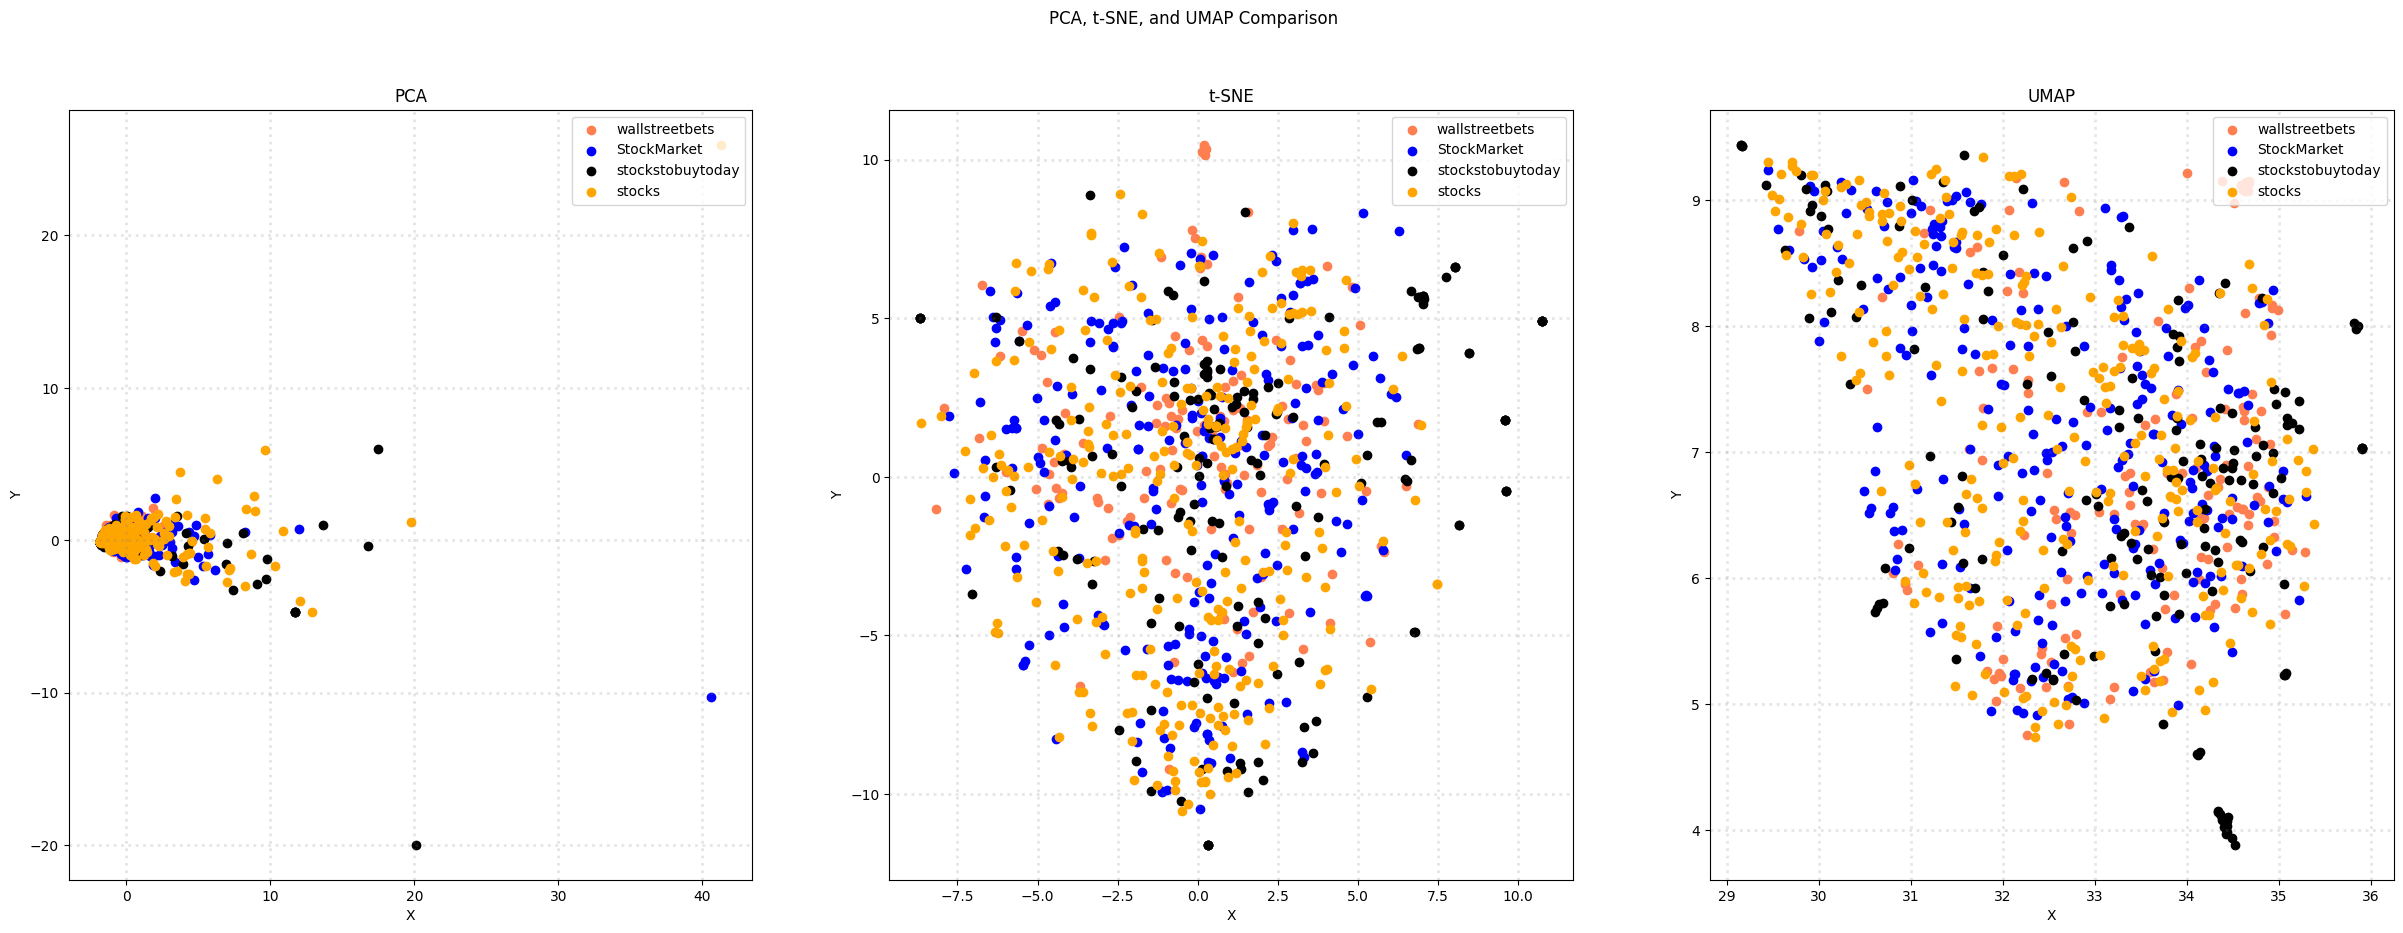

In [147]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = Reddit['subreddit'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[Reddit['subreddit'] == category].T[0]
        ys = X_reduced[Reddit['subreddit'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [148]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

/Users/r0wan/DM2025/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning:

divide by zero encountered in matmul

/Users/r0wan/DM2025/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning:

overflow encountered in matmul

/Users/r0wan/DM2025/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning:

invalid value encountered in matmul

/Users/r0wan/DM2025/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning:

divide by zero encountered in matmul

/Users/r0wan/DM2025/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning:

overflow encountered in matmul

/Users/r0wan/DM2025/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning:

invalid value encountered in matmul

/Users/r0wan/DM2025/DM2025-Lab1-Exercise/.venv/l

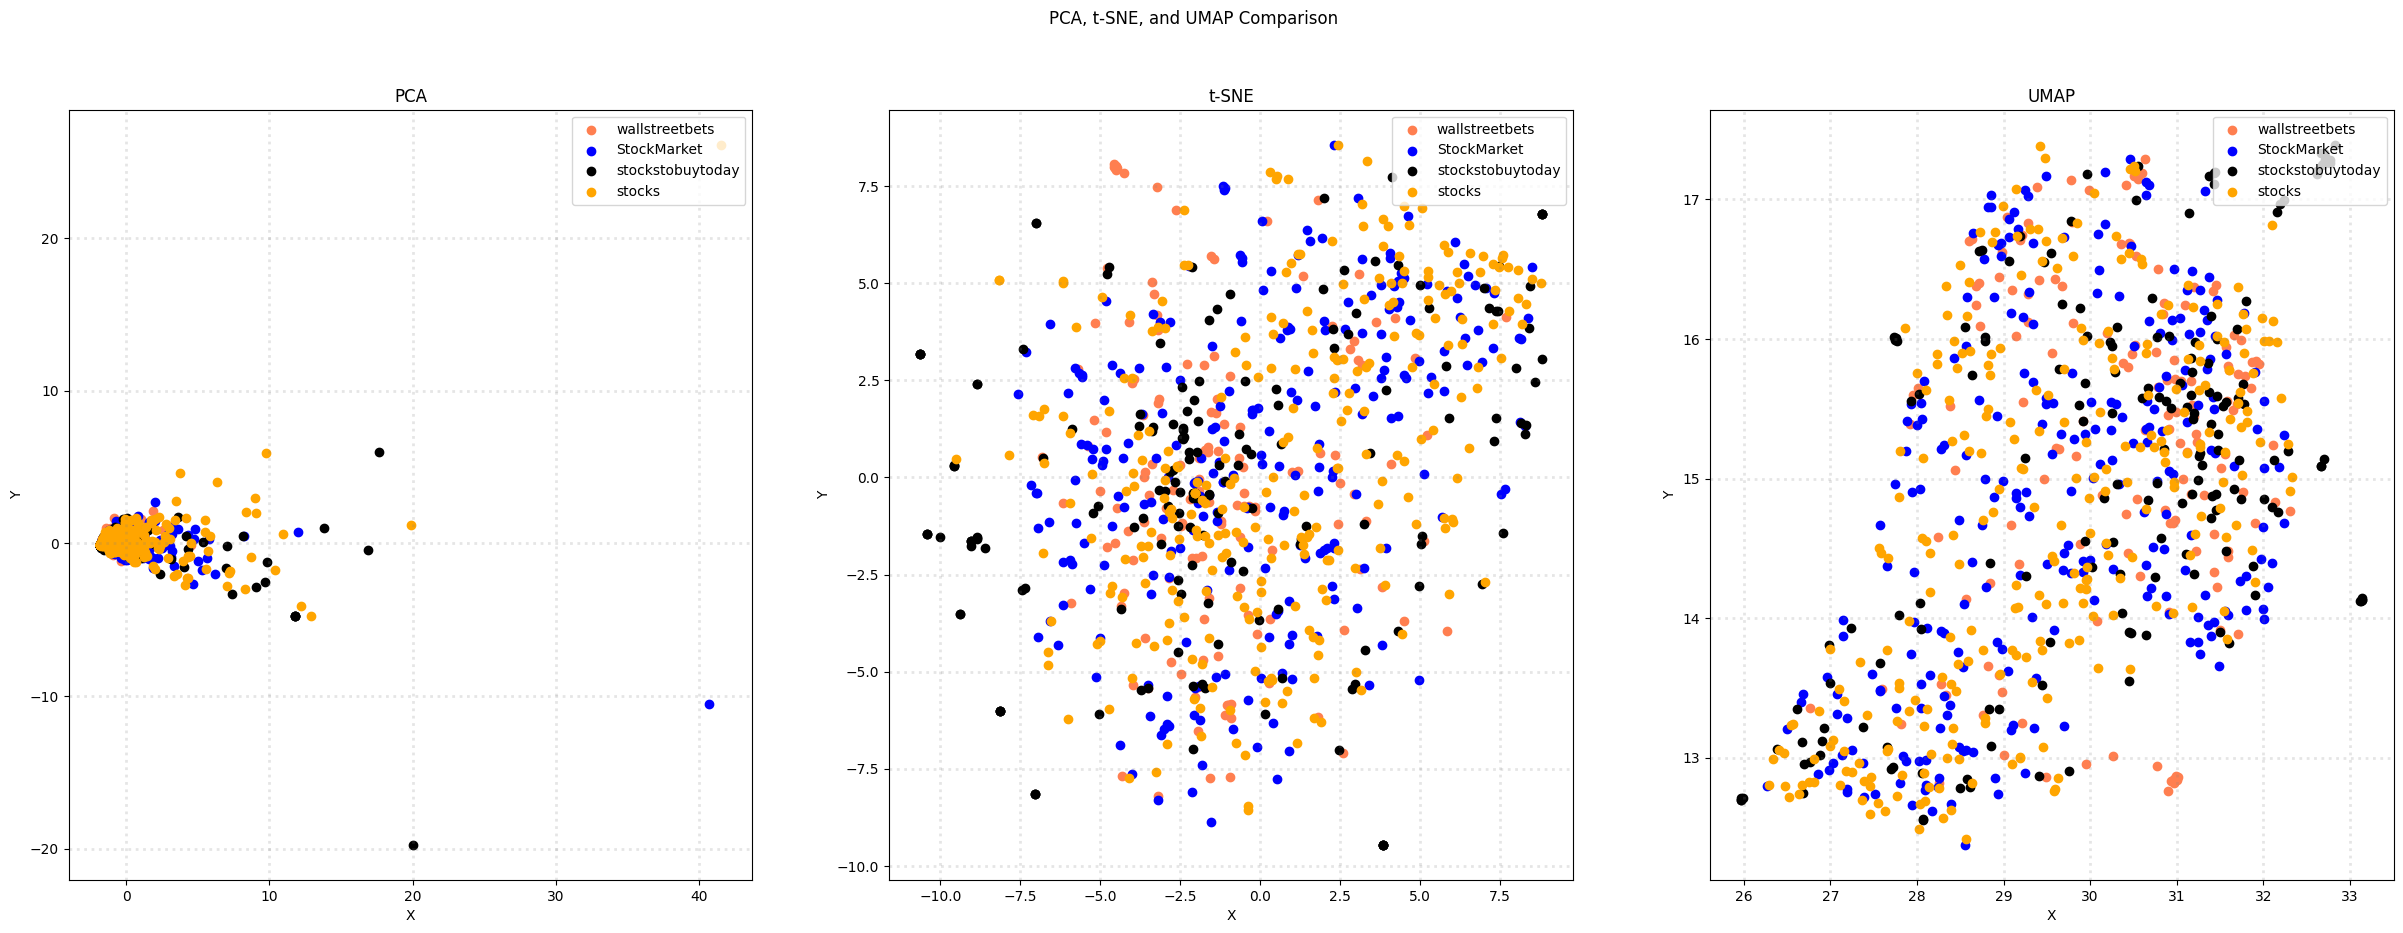

In [149]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = Reddit['subreddit'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[Reddit['subreddit'] == category].T[0]
        ys = X_reduced[Reddit['subreddit'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

#### >>> Exercise 18

/Users/r0wan/DM2025/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning:

divide by zero encountered in matmul

/Users/r0wan/DM2025/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning:

overflow encountered in matmul

/Users/r0wan/DM2025/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning:

invalid value encountered in matmul

/Users/r0wan/DM2025/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning:

divide by zero encountered in matmul

/Users/r0wan/DM2025/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning:

overflow encountered in matmul

/Users/r0wan/DM2025/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning:

invalid value encountered in matmul

/Users/r0wan/DM2025/DM2025-Lab1-Exercise/.venv/l

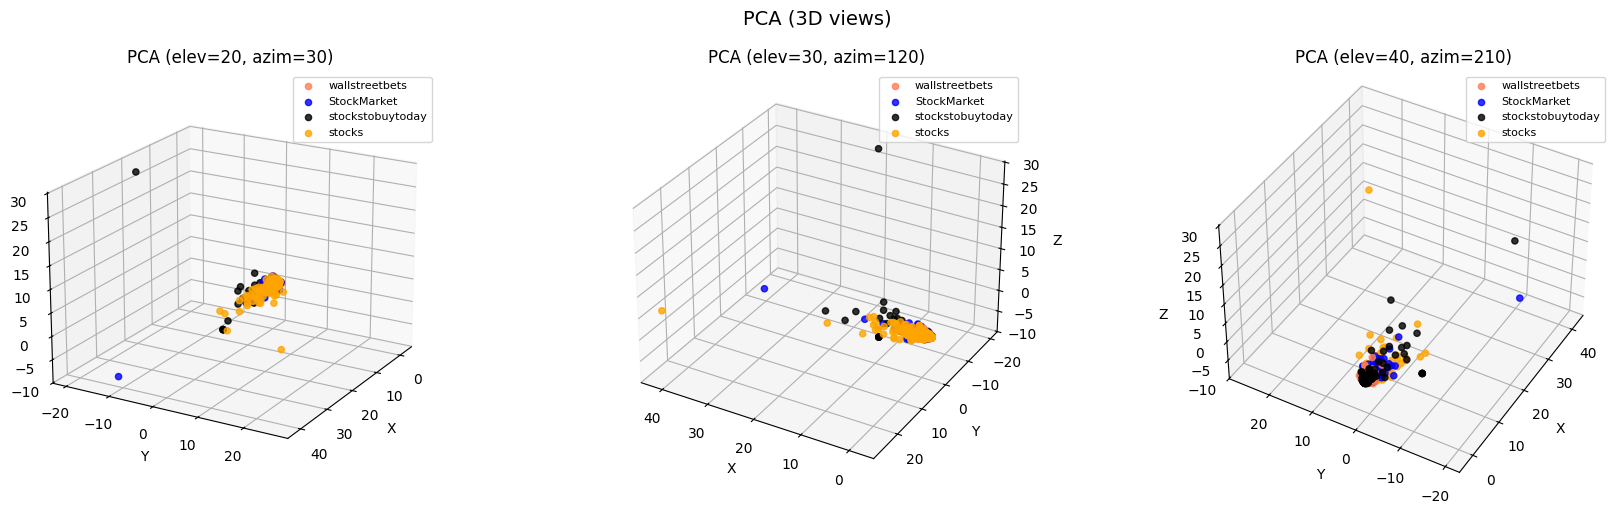

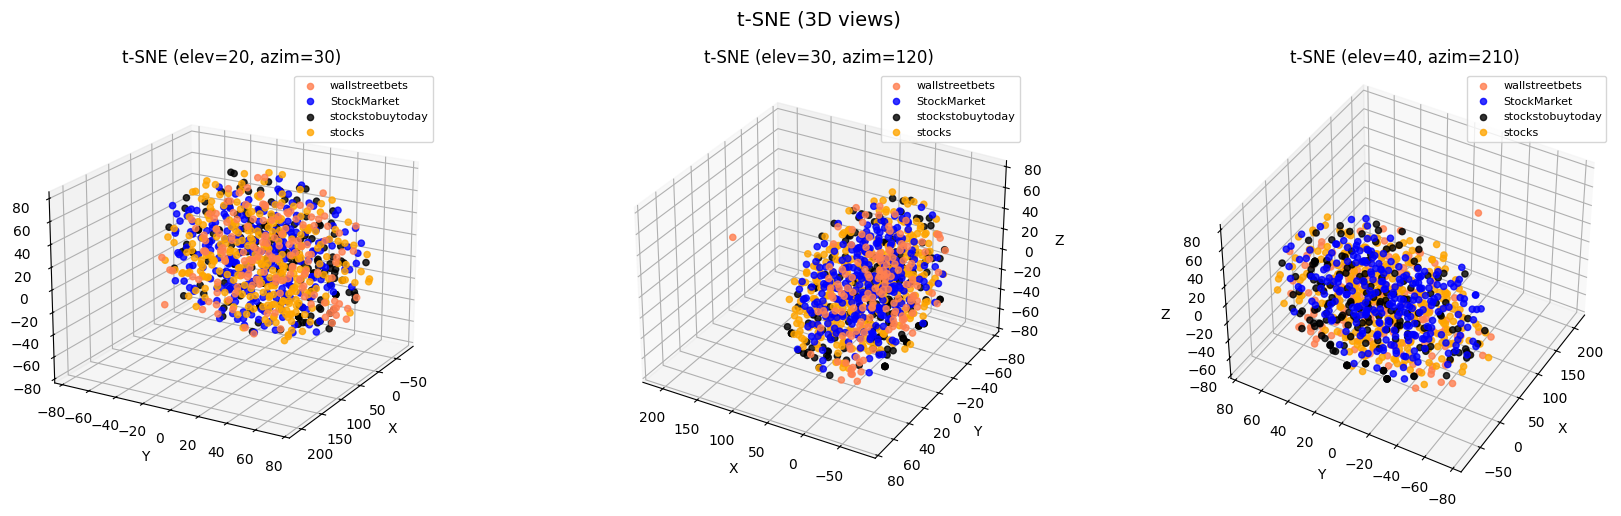

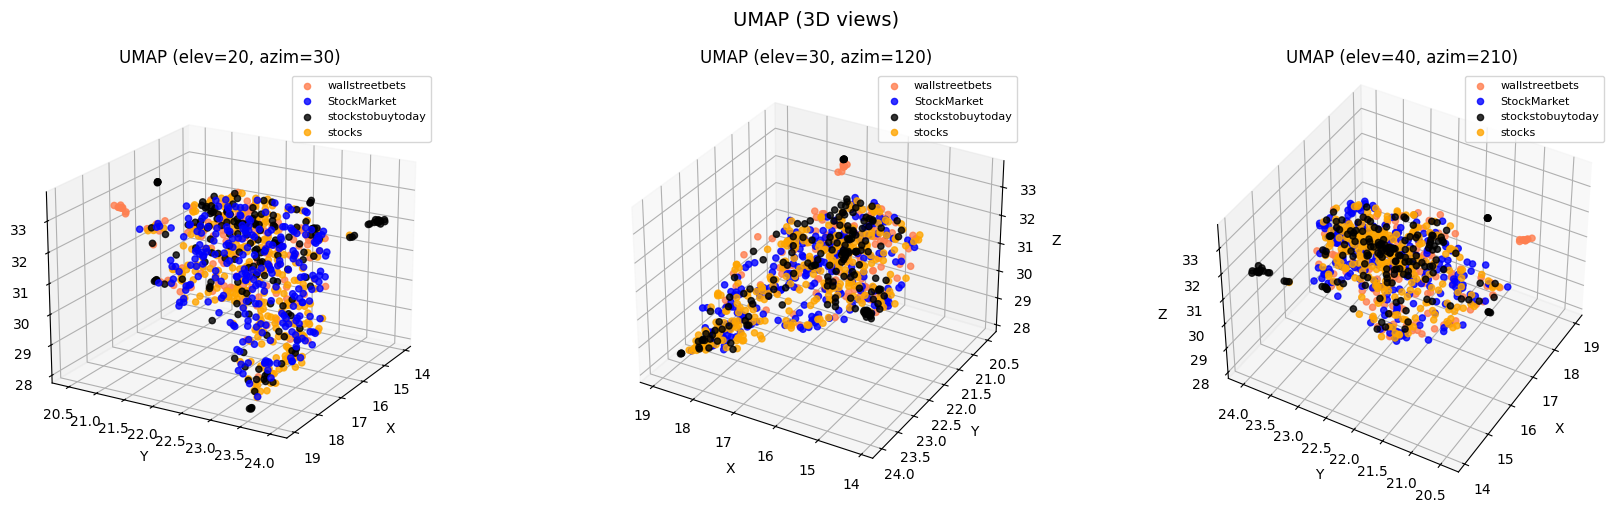

In [151]:
#Answer Here
from mpl_toolkits.mplot3d import Axes3D

X_pca3_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne3_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap3_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

col = ['coral', 'blue', 'black', 'orange']
categories = Reddit['subreddit'].unique()

# Function to create 3D scatter plot
def plot_scatter_3d(ax, X_reduced, title, elev=20, azim=30):
    for c, category in zip(col, categories):
        subset = X_reduced[Reddit['subreddit'] == category]
        ax.scatter(subset[:, 0], subset[:, 1], subset[:, 2],
                   c=c, marker='o', label=category, alpha=0.8)
    ax.view_init(elev=elev, azim=azim)
    ax.set_title(title + f" (elev={elev}, azim={azim})")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='best', fontsize=8)
    ax.grid(color='gray', linestyle=':', linewidth=1, alpha=0.3)

# three different viewing angles
angles = [(20, 30), (30, 120), (40, 210)]

# Create 3D scatter plots for each method with different viewing angles
for X_emb, title in zip([X_pca3_aug, X_tsne3_aug, X_umap3_aug], ['PCA', 't-SNE', 'UMAP']):
    fig = plt.figure(figsize=(18, 5))
    fig.suptitle(f'{title} (3D views)', fontsize=14)
    for i, (elev, azim) in enumerate(angles, 1):
        ax = fig.add_subplot(1, 3, i, projection='3d')
        plot_scatter_3d(ax, X_emb, title, elev, azim)
    plt.tight_layout()
    plt.show()

### Augmented data
#### PCA: 
##### observation:
* 四個社群的樣本點大多集中在低維空間的一個扁平區域中，形成近似線狀分佈。
* wallstreetbets（珊瑚色）與 stocks（橘色）資料點相互重疊明顯，顯示兩者的文本特徵差異不大。StockMarket（深藍）與 stockstobuytoday（黑）則略為分散，有部分孤立點遠離主要群集。
#### t-SNE: 
##### observation:
* 資料點整體形成一個密集球體結構，各類別間明顯重疊。
* 雖然 StockMarket 與 stockstobuytoday（藍與黑）在球體中部形成局部密集區，但界線不明顯。
wallstreetbets 與 stocks 的分佈更為分散，四者未出現明顯的分群界面。
#### UMAP: 
##### observation:
* UMAP 的分佈呈現平面狀曲面結構，顯示語料存在某種低維流形。
* 各類別在平面上分佈均勻，但 StockMarket 與 stockstobuytoday 的密度略高，顯示語料語意更為集中。
* 少數 wallstreetbets 與 stocks 樣本位於邊緣，可能代表語氣或主題上較極端的貼文（如情緒化、口語化內容）。

### 5.6 Discretization and Binarization

In [152]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [154]:
mlb = preprocessing.LabelBinarizer()

In [157]:
mlb.fit(Reddit.subreddit)

LabelBinarizer()

In [159]:
Reddit['bin_category'] = mlb.transform(Reddit['subreddit']).tolist()

In [160]:
Reddit[0:9]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,is_post,tokenized_text,bin_category
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,0,"{retards, on, Calls}","[0, 0, 0, 1]"
1,comment,2025-04-12 01:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,0,"{why, No, first, should, the, big, politics, d...","[0, 0, 0, 1]"
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,0,"{of, ticker., in, the, red, lots, Seeing}","[1, 0, 0, 0]"
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,1,"{your, Torrente., skill,, creating, be, unthin...","[0, 0, 1, 0]"
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0,0,"{say, thank, didn’t, you., He}","[1, 0, 0, 0]"
5,comment,2025-04-12 02:19:03,mmo4k9g,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,https://www.reddit.com/r/wallstreetbets/commen...,16,NaN,NaN,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,"['tonight', 'puss']",0.0,0,"{ejaculate, wish, puss, to, Hoping, in, warm, ...","[0, 0, 0, 1]"
6,comment,2025-04-11 12:37:23,mmjx7vz,stocks,Is the market in complete denial right now?,stoniey84,https://www.reddit.com/r/stocks/comments/1jwo1...,5,NaN,NaN,Trump will respond to china increasing their t...,0.380000,-0.108333,-1.0,"['JPow', 'Jerome', 'i', 'reporting', 'Trump', ...",-1.0,0,"{fire, be, to, their, respond, the, think, Jer...","[0, 1, 0, 0]"
7,comment,2025-04-11 17:28:50,mmlhxwc,wallstreetbets,Retardation is on the menu boys! WSB is so back,OSRSkarma,https://i.redd.it/0yq2ftren8ue1.jpeg,-3,NaN,NaN,Confirmed not a trap. Its been like this for p...,0.700000,0.050000,1.0,"['Confirmed', 'mouth', 'word', 'trap']",0.0,0,"{word, probably, just, we, this, mouth, of, by...","[0, 0, 0, 1]"
8,comment,2021-02-01 15:36:32,gllyi5z,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",Blondbox,https://www.reddit.com/r/stocks/comments/la34b...,1,NaN,NaN,Am I the only one seeing the cup & handle brea...,0.491818,0.057045,1.0,"['cup', 'Day', 'handle', 'pivot', 'Green', 'tr...",1.0,0,"{only, Follow, 52, &, cup, to, here?, the, wee...","[0, 1, 0, 0]"


#### >>>Exercise 19

In [ ]:
# Answer here
mlb.fit(Reddit.subreddit.values)     #yes, by translate str to binary
Reddit['bin_category_name'] = mlb.transform(Reddit['subreddit']).tolist()
Reddit[0:9]

# in this case, only "subreddit" column is categorical, so only encode this column

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,is_post,tokenized_text,bin_category,bin_category_name
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,0,"{retards, on, Calls}","[0, 0, 0, 1]","[0, 0, 0, 1]"
1,comment,2025-04-12 01:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,0,"{why, No, first, should, the, big, politics, d...","[0, 0, 0, 1]","[0, 0, 0, 1]"
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,0,"{of, ticker., in, the, red, lots, Seeing}","[1, 0, 0, 0]","[1, 0, 0, 0]"
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,1,"{your, Torrente., skill,, creating, be, unthin...","[0, 0, 1, 0]","[0, 0, 1, 0]"
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0,0,"{say, thank, didn’t, you., He}","[1, 0, 0, 0]","[1, 0, 0, 0]"
5,comment,2025-04-12 02:19:03,mmo4k9g,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,https://www.reddit.com/r/wallstreetbets/commen...,16,NaN,NaN,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,"['tonight', 'puss']",0.0,0,"{ejaculate, wish, puss, to, Hoping, in, warm, ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
6,comment,2025-04-11 12:37:23,mmjx7vz,stocks,Is the market in complete denial right now?,stoniey84,https://www.reddit.com/r/stocks/comments/1jwo1...,5,NaN,NaN,Trump will respond to china increasing their t...,0.380000,-0.108333,-1.0,"['JPow', 'Jerome', 'i', 'reporting', 'Trump', ...",-1.0,0,"{fire, be, to, their, respond, the, think, Jer...","[0, 1, 0, 0]","[0, 1, 0, 0]"
7,comment,2025-04-11 17:28:50,mmlhxwc,wallstreetbets,Retardation is on the menu boys! WSB is so back,OSRSkarma,https://i.redd.it/0yq2ftren8ue1.jpeg,-3,NaN,NaN,Confirmed not a trap. Its been like this for p...,0.700000,0.050000,1.0,"['Confirmed', 'mouth', 'word', 'trap']",0.0,0,"{word, probably, just, we, this, mouth, of, by...","[0, 0, 0, 1]","[0, 0, 0, 1]"
8,comment,2021-02-01 15:36:32,gllyi5z,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",Blondbox,https://www.reddit.com/r/stocks/comments/la34b...,1,NaN,NaN,Am I the only one seeing the cup & handle brea...,0.491818,0.057045,1.0,"['cup', 'Day', 'handle', 'pivot', 'Green', 'tr...",1.0,0,"{only, Follow, 52, &, cup, to, here?, the, wee...","[0, 1, 0, 0]","[0, 1, 0, 0]"


## 6. Data Exploration

In [167]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = Reddit.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = Reddit.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = Reddit.iloc[800]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [168]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["It's a copy/paste from a Bloomberg terminal."]
['Do we have a copy of trump’s kindergarten graduation certificate? Ideally the long form version.']
["It's a pretty unremarkable product, but you would easily be able to find the exact company if I said what the product is.\n\nAs a distributor I don't want to leak what is basically insider information on them."]


In [169]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [170]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.109109
Cosine Similarity using count bw 1 and 3: 0.061546
Cosine Similarity using count bw 2 and 3: 0.080582
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/49/11swh7_n1x358qyfrqndksw00000gn/T/ipykernel_81219/452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/49/11swh7_n1x358qyfrqndksw00000gn/T/ipykernel_81219/452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/49/11swh7_n1x358qyfrqndksw00000gn/T/ipykernel_81219/452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/49/11swh7_n1x358qyfrqndksw00000gn/T/ipykernel_81219/452772485.py:17: Dep

#### >>> Exercise 20

### 7. Data Classification

In [173]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(Reddit[['subreddit']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, Reddit['category'], test_size=0.3, random_state=42)

ValueError: dictionary update sequence element #0 has length 1; 2 is required

In [ ]:
X_train

In [ ]:
X_test


In [ ]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

#### >>> Exercise 21

In [ ]:
#Answer

y = Reddit['category_name']  
X_train, X_test, y_train, y_test = train_test_split(augmented_df, y, test_size=0.3, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

#### >>> EXercise 22

In [ ]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

#### >>> Exercise 23

#### >>> Exercise 24

#### >>> Exercise 25